In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('fifa19data.csv')

In [3]:
data.drop('Unnamed: 0',1, inplace = True)

## Find out the most Economical and most Lavish Club in FIFA 19

Clean the Data for analysis.

In [4]:
data.Wage = data.Wage.map(lambda x: x.lstrip('€').rstrip('K'))

data.Wage = data.Wage.astype(int)

data.Wage = data.Wage * 1000

In [4]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [17]:
len(data.Club.unique())

652

In [6]:
club = data[['Club','Overall','Wage']]

In [7]:
club['Wage/Rating'] = club['Wage']/club['Overall']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
club = club.groupby('Club').mean()

In [9]:
club = club[club.Overall >=74]

In [10]:
ecoclub = club.sort_values('Wage/Rating', ascending = True).head(10)

In [11]:
ecoclub

,Overall,Wage,Wage/Rating
Club,,,
SL Benfica,77.000000,12035.714286,153.393582
SC Braga,74.821429,12500.000000,165.480989
FC Porto,76.678571,14642.857143,187.229207
Sporting CP,76.133333,14866.666667,192.179671
Sevilla FC,75.200000,18533.333333,235.990927
Real Betis,75.185185,22925.925926,289.868549
Villarreal CF,74.343750,24718.750000,316.641462
FC Schalke 04,74.310345,24586.206897,317.488355
Valencia CF,74.696970,28121.212121,354.289470


(array([100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 9 Text yticklabel objects>)

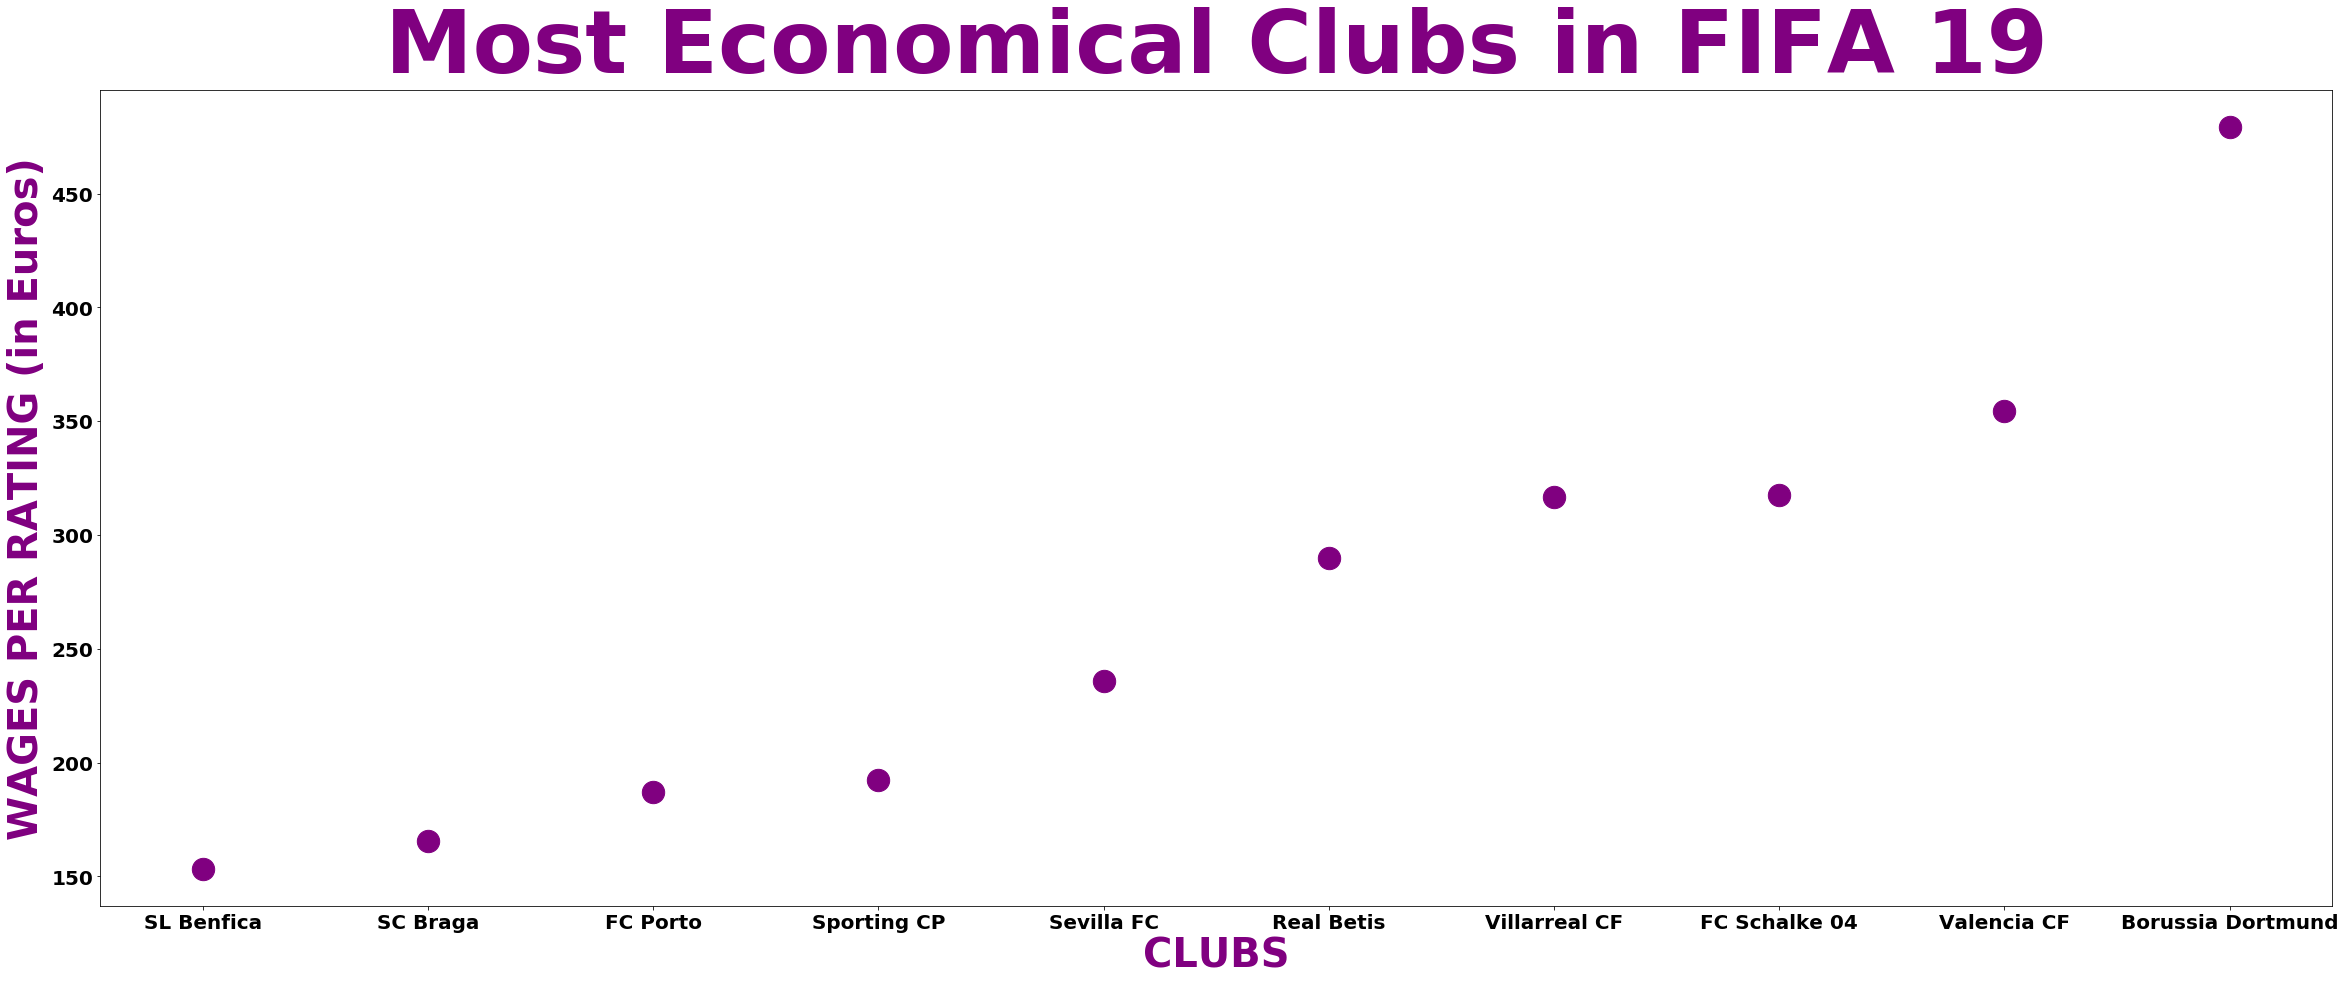

In [11]:
plt.figure(figsize = (40,15))
plt.scatter(x = ecoclub.index.values, y =ecoclub['Wage/Rating'], color = 'purple', s = 500)
plt.title('Most Economical Clubs in FIFA 19',fontsize = 88, weight = 'bold', color = 'purple')
plt.xlabel('CLUBS', fontsize = 40, weight = 'bold', color = 'purple')
plt.ylabel('WAGES PER RATING (in Euros)', fontsize = 40, weight = 'bold', color = 'purple')
plt.xticks(fontsize = 20, weight = 'bold')
plt.yticks(fontsize = 20, weight = 'bold')

In [18]:
lavclub = club.sort_values('Wage/Rating', ascending = False).head(10)

In [19]:
lavclub

,Overall,Wage,Wage/Rating
Club,,,
Real Madrid,78.242424,152030.303030,1784.575701
FC Barcelona,78.030303,146575.757576,1721.032363
Juventus,82.280000,131680.000000,1545.742373
Manchester City,76.727273,113363.636364,1344.513339
Manchester United,77.242424,102757.575758,1257.590944
Chelsea,76.787879,98454.545455,1197.114569
Liverpool,76.000000,87939.393939,1079.792716
Arsenal,75.181818,78424.242424,971.493917
Tottenham Hotspur,76.696970,79484.848485,970.461491


(array([ 800., 1000., 1200., 1400., 1600., 1800., 2000.]),
 <a list of 7 Text yticklabel objects>)

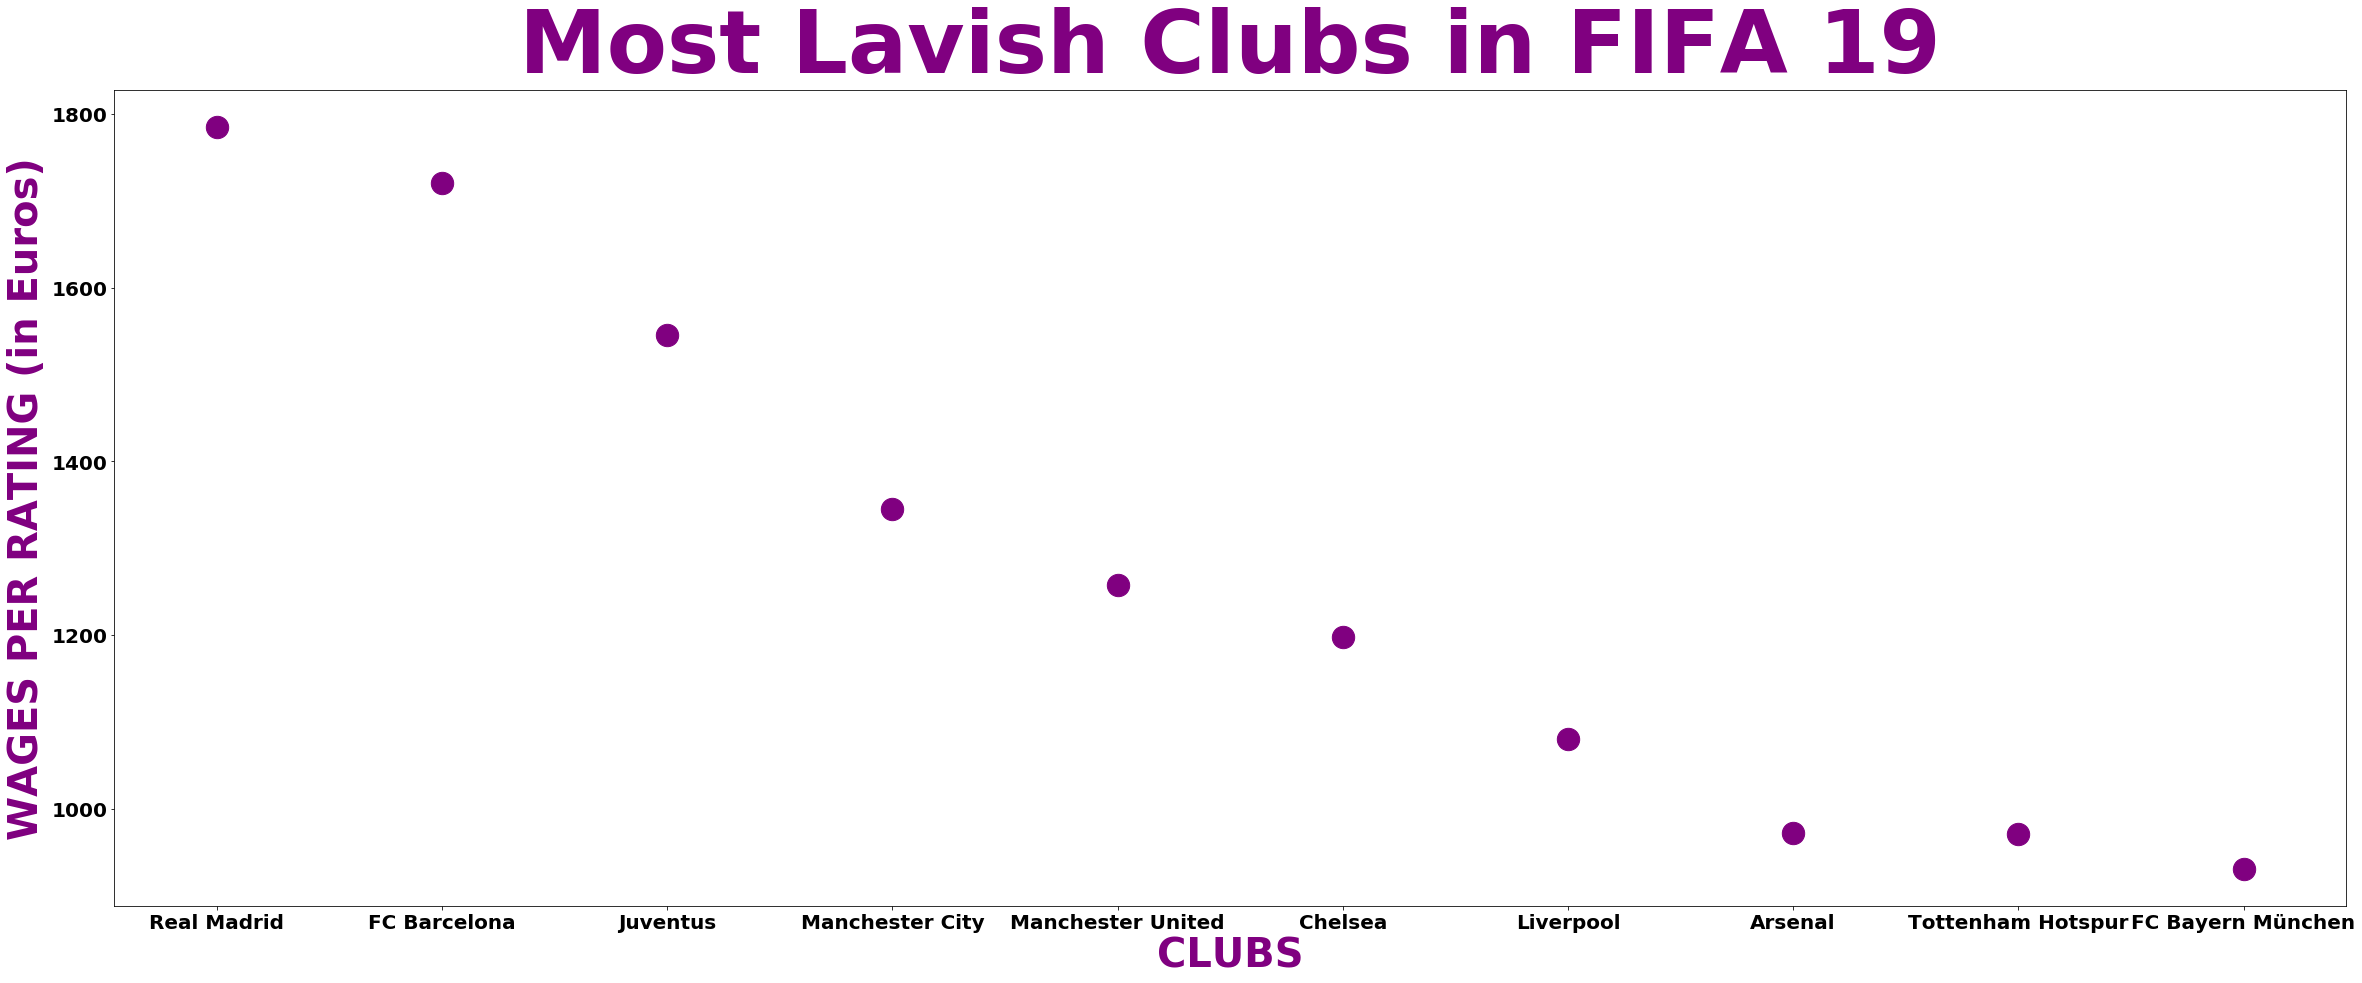

In [13]:
plt.figure(figsize = (40,15))
plt.scatter(x = lavclub.index.values, y =lavclub['Wage/Rating'], s = 500, color = 'purple')
plt.title('Most Lavish Clubs in FIFA 19',fontsize = 88, weight = 'bold', color = 'purple')
plt.xlabel('CLUBS', fontsize = 40, weight = 'bold', color = 'purple')
plt.ylabel('WAGES PER RATING (in Euros)', fontsize = 40, weight = 'bold', color = 'purple')
plt.xticks(fontsize = 20, weight = 'bold')
plt.yticks(fontsize = 20, weight = 'bold')

## FIND Countries whose average player earns Highest and Lowest Income

In [20]:
country = data[['Nationality','Age','Wage']]

In [21]:
country = country[country.Age >=18]

In [22]:
country.drop('Age', axis = 1, inplace = True)

In [23]:
concount = pd.DataFrame(country.groupby('Nationality').Nationality.count())

In [24]:
concount.rename(columns ={'Nationality':'Count'}, inplace = True)

In [25]:
concount['Nationality'] = concount.index.values

In [26]:
concount.reset_index(drop = True, inplace = True)

In [27]:
country = country.groupby('Nationality').sum()

In [28]:
country = pd.merge(country, concount, on = 'Nationality')

In [29]:
country = country[country.Count >= 100]

In [30]:
country['Wage/Player'] = (country['Wage']/country['Count'])

In [31]:
country['Wage/Player'] = country['Wage/Player'].round()

In [32]:
highincomecountry = country.sort_values('Wage/Player', ascending = False)

In [33]:
highincomecountry.reset_index(drop = True, inplace = True)

In [40]:
highincomecountry.head(10)

,Nationality,Wage,Count,Wage/Player
0,Croatia,2731000,125,21848.0
1,Belgium,4797000,254,18886.0
2,Brazil,14621000,824,17744.0
3,Uruguay,2534000,149,17007.0
4,Spain,17470000,1060,16481.0
5,Senegal,1867000,130,14362.0
6,Portugal,4607000,321,14352.0
7,France,12786000,893,14318.0
8,Italy,9441000,693,13623.0
9,Serbia,1689000,126,13405.0


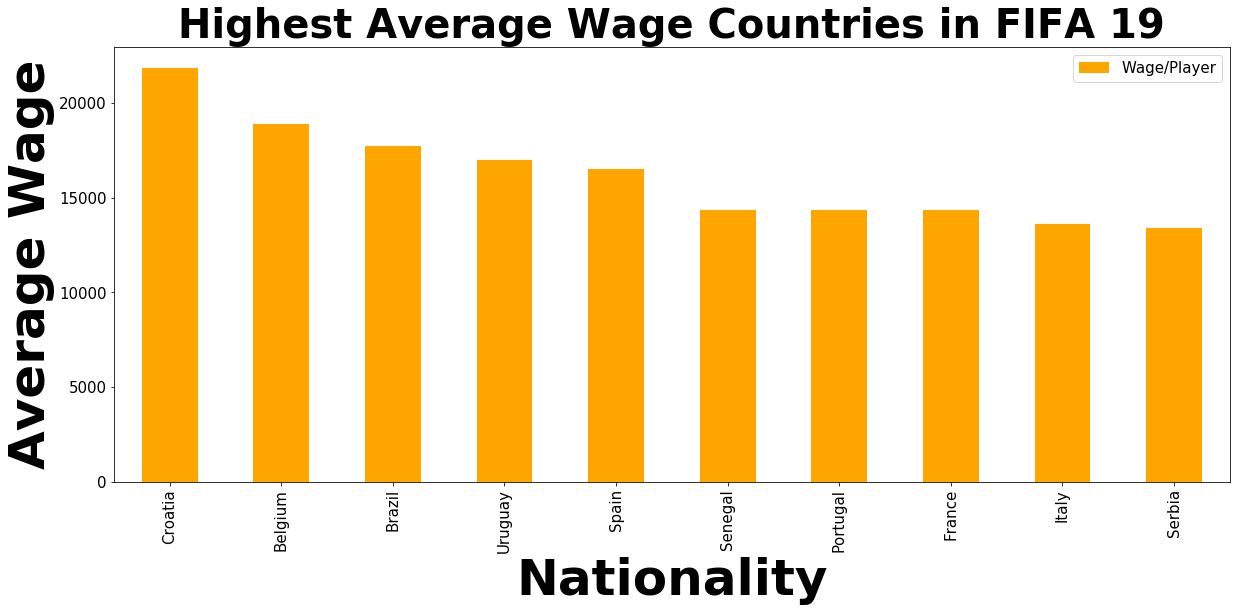

In [35]:
highincomecountry.head(10).plot.bar(x = 'Nationality', y = 'Wage/Player', figsize = (20,8), color = 'orange')
plt.title('Highest Average Wage Countries in FIFA 19', fontsize = 40, weight = 'bold')
plt.xlabel('Nationality', fontsize = 50, weight = 'bold')
plt.ylabel('Average Wage', fontsize = 50, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

In [36]:
lowincomecountry = country.sort_values('Wage/Player', ascending = True)

In [37]:
lowincomecountry.reset_index(drop = True, inplace = True)

In [38]:
lowincomecountry.head(10)

,Nationality,Wage,Count,Wage/Player
0,Korea Republic,1019000,334,3051.0
1,China PR,1224000,391,3130.0
2,Australia,780000,227,3436.0
3,Japan,1648000,475,3469.0
4,Norway,1117000,322,3469.0
5,Sweden,1604000,383,4188.0
6,United States,1497000,347,4314.0
7,Saudi Arabia,1740000,340,5118.0
8,Republic of Ireland,1814000,351,5168.0
9,Chile,2018000,385,5242.0


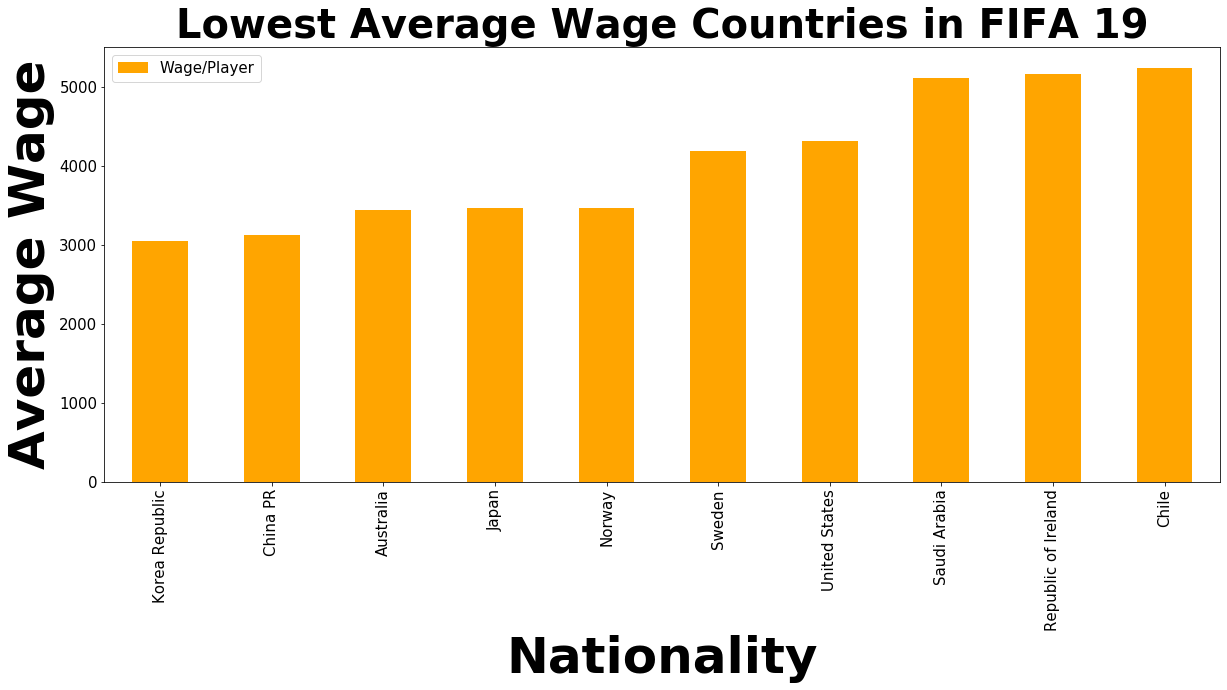

In [88]:
lowincomecountry.head(10).plot.bar(x = 'Nationality', y = 'Wage/Player', figsize = (20,8), color = 'orange')
plt.title('Lowest Average Wage Countries in FIFA 19', fontsize = 40, weight = 'bold')
plt.xlabel('Nationality', fontsize = 50, weight = 'bold')
plt.ylabel('Average Wage', fontsize = 50, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

### Countries with Best Forwards, Midfielders, Defenders and Goalkeepers

In [5]:
data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

#### Best Forwards

In [6]:
st = data[data.Position.isin(['ST','CF','RF','LF','RS','LS','LW','RW'])]

In [7]:
st = st[['Nationality','Age','Overall']]

In [8]:
st = st.sort_values('Overall', ascending = False).head(100)

In [9]:
players = pd.DataFrame(st.Nationality.value_counts())

In [10]:
players.columns = ['Count']
players['Nationality'] = players.index.values
players.reset_index(drop = True, inplace = True)

In [11]:
bestst = st.groupby('Nationality').mean()

In [12]:
bestst = pd.merge(bestst,players, on = 'Nationality')

In [13]:
bestst = bestst[bestst.Count >=5]

In [14]:
bestst = bestst.sort_values('Overall', ascending = False).head(5)
bestst.reset_index(drop = True, inplace = True)

In [15]:
bestst

,Nationality,Age,Overall,Count
0,Argentina,29.100000,85.300000,10
1,Brazil,26.800000,84.200000,10
2,Italy,28.000000,83.125000,8
3,England,26.333333,83.000000,6
4,Spain,28.476190,82.666667,21


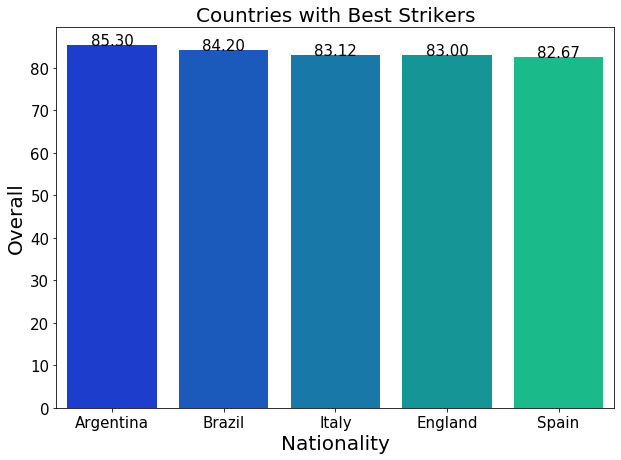

In [96]:
plt.figure(figsize =(10,7))
ax = sns.barplot(x = 'Nationality', y = 'Overall', data = bestst, palette = 'winter')
plt.title('Countries with Best Strikers', fontsize = 20)
plt.xlabel('Nationality',fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize = 15) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

#### Best Midfielders

In [36]:
mf = data[data.Position.isin(['CM','CDM','CAM','RAM','LAM','RCM','LCM','RDM','LDM','LM','RM'])]

In [37]:
mf = mf[['Nationality','Age','Overall']].sort_values('Overall', ascending = False).head(100)

In [38]:
count = pd.DataFrame(mf.Nationality.value_counts())

In [39]:
count.columns = ['Count']
count['Nationality'] = count.index.values
count.reset_index(drop = True, inplace = True)

In [40]:
mf = mf.groupby('Nationality').mean().sort_values('Overall', ascending = False)

In [41]:
mf = pd.merge(mf, count, on = 'Nationality')

In [42]:
mf = mf[mf.Count >=5].head(5)
mf.reset_index(drop = True, inplace = True)

In [43]:
mf

,Nationality,Age,Overall,Count
0,Belgium,28.000000,85.200000,5
1,Spain,28.416667,85.000000,12
2,Germany,26.800000,85.000000,10
3,France,25.928571,84.857143,14
4,Brazil,27.000000,84.133333,15


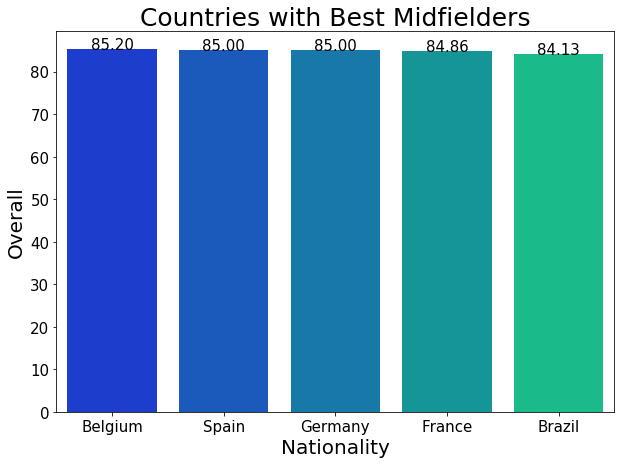

In [130]:
plt.figure(figsize =(10,7))
ax = sns.barplot(x = 'Nationality', y = 'Overall', data = mf, palette = 'winter')
plt.title('Countries with Best Midfielders', fontsize = 25)
plt.xlabel('Nationality',fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize = 15) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

#### Best Defenders

In [53]:
df = data[data.Position.isin(['CB','RCB','LCB','LB','LWB','RB','RWB'])]

In [54]:
df = df[['Nationality','Age','Overall']].sort_values('Overall',ascending = False).head(100)

In [55]:
countdf = pd.DataFrame(df.Nationality.value_counts())

In [56]:
countdf.columns = ['Count']
countdf['Nationality'] = countdf.index.values
countdf.reset_index(drop =True, inplace = True)

In [57]:
df = df.groupby('Nationality').mean().sort_values('Overall', ascending = False)

In [58]:
df = pd.merge(df, countdf, on = 'Nationality')

In [59]:
df = df[df.Count >=5].head(5)
df.reset_index(drop = True, inplace = True)

In [60]:
df

,Nationality,Age,Overall,Count
0,Spain,28.307692,84.230769,13
1,Brazil,30.600000,84.066667,15
2,Italy,29.142857,84.000000,7
3,France,26.444444,83.222222,9
4,Germany,26.700000,83.000000,10


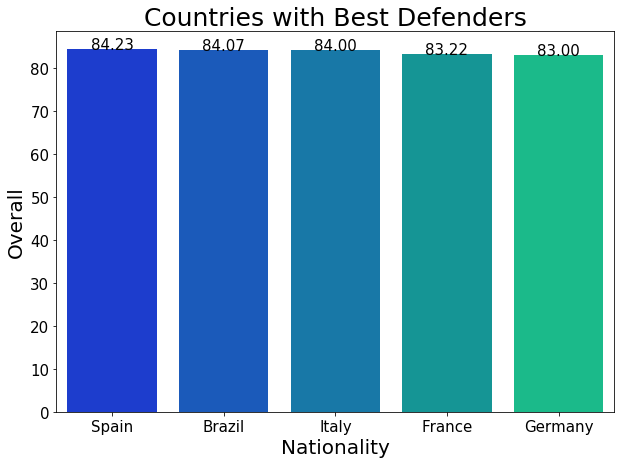

In [129]:
plt.figure(figsize =(10,7))
ax = sns.barplot(x = 'Nationality', y = 'Overall', data = df, palette = 'winter')
plt.title('Countries with Best Defenders', fontsize = 25)
plt.xlabel('Nationality',fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize = 15) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

#### Best Goalkeepers

In [62]:
gk = data[data.Position == 'GK']

In [63]:
gk = gk[['Nationality','Age','Overall']].sort_values('Overall', ascending = False).head(100)

In [64]:
countgk = pd.DataFrame(gk.Nationality.value_counts())

In [65]:
countgk.columns = ['Count']
countgk['Nationality'] = countgk.index.values

In [66]:
gk = gk.groupby('Nationality').mean().sort_values('Overall', ascending = False)

In [67]:
gk = pd.merge(gk, countgk, on = 'Nationality')

In [68]:
bestgk = gk[gk.Count >=5].head(5)
bestgk.reset_index(drop = True, inplace = True)

In [69]:
bestgk

,Nationality,Age,Overall,Count
0,Germany,28.090909,82.545455,11
1,France,29.142857,81.857143,7
2,Italy,30.100000,81.600000,10
3,Brazil,26.428571,81.571429,7
4,Spain,29.562500,81.312500,16


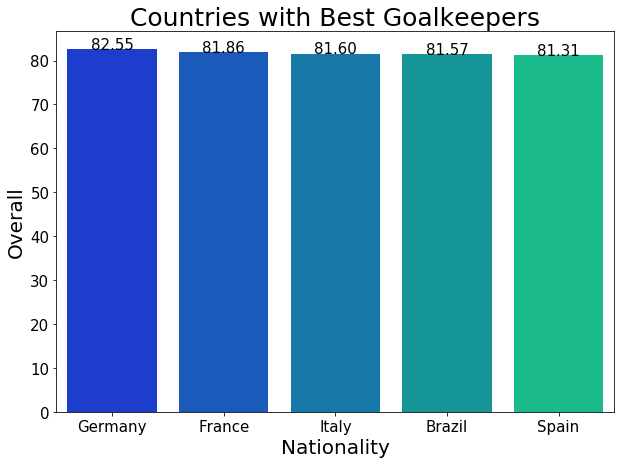

In [74]:
plt.figure(figsize =(10,7))
ax = sns.barplot(x = 'Nationality', y = 'Overall', data = bestgk, palette = 'winter')
plt.title('Countries with Best Goalkeepers', fontsize = 25)
plt.xlabel('Nationality',fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize = 15) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

### Countries with Best Players

In [52]:
pl = data[['Nationality','Age','Overall']].sort_values('Overall', ascending = False).head(200)

In [53]:
countpl = pd.DataFrame(pl.Nationality.value_counts())

In [54]:
countpl.columns = ['Count']
countpl['Nationality'] = countpl.index.values

In [55]:
pl = pl.groupby('Nationality').mean().sort_values('Overall', ascending = False)

In [56]:
bestpl = pd.merge(pl,countpl, on = 'Nationality')

In [57]:
bestpl = bestpl[bestpl.Count >=5].head(10)
bestpl.reset_index(drop = True, inplace = True)

In [58]:
bestpl

,Nationality,Age,Overall,Count
0,Argentina,28.888889,87.111111,9
1,Belgium,28.818182,86.818182,11
2,Croatia,31.200000,86.000000,5
3,Italy,30.250000,85.416667,12
4,Spain,28.827586,85.310345,29
5,Portugal,28.777778,85.222222,9
6,Germany,26.619048,85.142857,21
7,Brazil,28.321429,85.107143,28
8,France,26.409091,85.090909,22
9,Netherlands,27.833333,84.000000,6


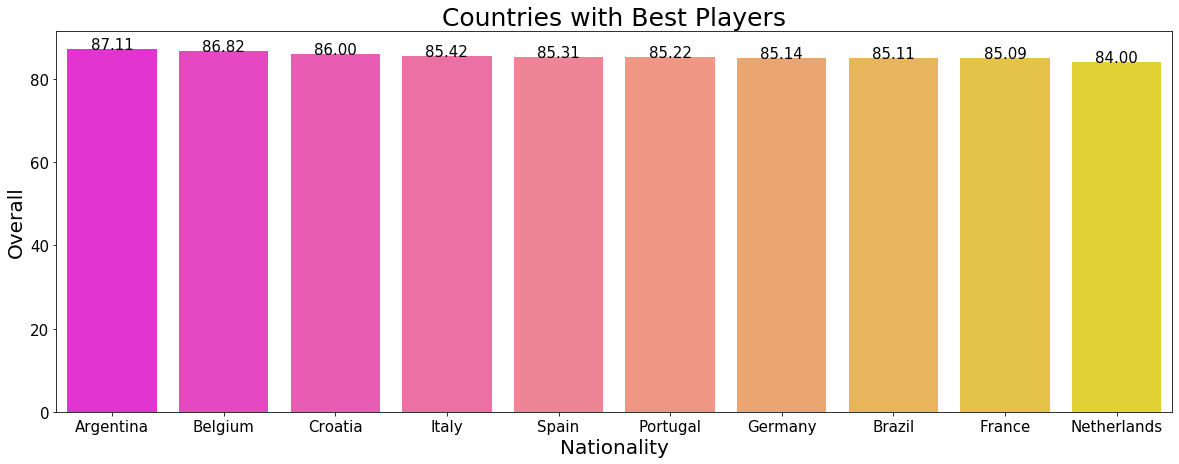

In [61]:
plt.figure(figsize =(20,7))
ax = sns.barplot(x = 'Nationality', y = 'Overall', data = bestpl, palette = 'spring')
plt.title('Countries with Best Players', fontsize = 25)
plt.xlabel('Nationality',fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize = 15) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

### Countries with best U-21 Players

In [78]:
u21 = data[data.Age <=21].sort_values('Overall', ascending = False)

In [79]:
u21 = u21[['Nationality','Age','Overall','Potential']].head(200)

In [80]:
u21count = pd.DataFrame(u21.Nationality.value_counts())

In [81]:
u21count.columns = ['Count']
u21count['Nationality'] = u21count.index.values
u21count.reset_index(drop = True, inplace = True)

In [82]:
u21 = u21.groupby('Nationality').mean().sort_values('Overall', ascending = False)

In [83]:
bestu21 = pd.merge(u21, u21count, on = 'Nationality')

In [84]:
bestu21 = bestu21[bestu21.Count >= 5].head(10)
bestu21.reset_index(drop = True, inplace = True)

In [85]:
bestu21

,Nationality,Age,Overall,Potential,Count
0,Italy,20.375000,77.125000,87.875000,8
1,Brazil,20.555556,76.944444,85.611111,18
2,Germany,20.666667,76.777778,84.555556,9
3,Portugal,20.545455,76.454545,84.363636,11
4,France,20.290323,76.419355,85.000000,31
5,Netherlands,20.181818,76.272727,84.545455,11
6,Spain,20.590909,75.954545,83.954545,22
7,England,20.058824,75.823529,85.352941,17
8,Nigeria,20.666667,75.500000,84.166667,6
9,Croatia,20.400000,75.400000,84.400000,5


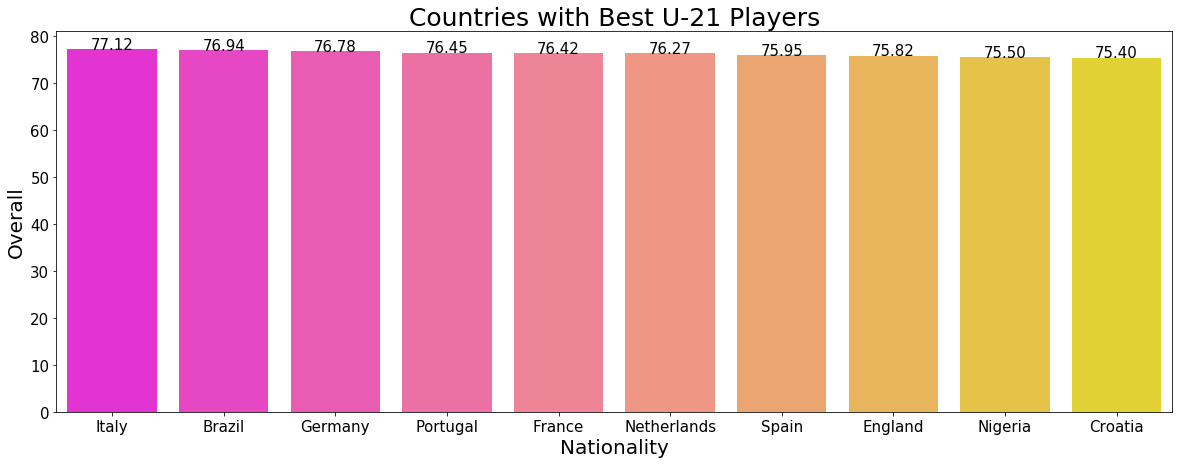

In [87]:
plt.figure(figsize =(20,7))
ax = sns.barplot(x = 'Nationality', y = 'Overall', data = bestu21, palette = 'spring')
plt.title('Countries with Best U-21 Players', fontsize = 25)
plt.xlabel('Nationality',fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize = 15) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)